In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import zscore

In [2]:
data = pd.read_excel('Base4.xlsx', engine = "openpyxl")
data.head(20)

,unsullen.id,production.date,report.date,produced,defects,supplier
0,1,1,1,103,0,harpy.co
1,1,1,2,0,2,harpy.co
2,1,1,3,0,4,harpy.co
3,1,1,4,0,5,harpy.co
4,1,1,5,0,13,harpy.co
5,1,1,6,0,11,harpy.co
6,1,1,7,0,11,harpy.co
7,1,2,2,105,0,harpy.co
8,1,2,3,0,2,harpy.co
9,1,2,4,0,2,harpy.co


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   unsullen.id      2700 non-null   int64 
 1   production.date  2700 non-null   int64 
 2   report.date      2700 non-null   int64 
 3   produced         2700 non-null   int64 
 4   defects          2700 non-null   int64 
 5   supplier         2700 non-null   object
dtypes: int64(5), object(1)
memory usage: 126.7+ KB


In [4]:
data['production.date'].max()

6

In [5]:
data['report.date'].max()

7

unsullen.id - идентификатор кузнеца
<br>
production.date - месяц производства
<br>
report.date - месяц отчета
<br>
produced - количество произведенных в данный месяц мечей
<br>
defects - число cломанных мечей
<br>
supplier - поставщик



### Количество произведенных и сломавшихся мечей для каждой из компании-поставщика за все время производства

In [6]:
all_time_data = data.drop(['unsullen.id', 'report.date', 'production.date'], axis=1)
all_time_data = all_time_data.groupby(['supplier'], as_index=False).sum()
all_time_data['%'] = all_time_data['defects']/all_time_data['produced']*100

In [7]:
all_time_data

,supplier,produced,defects,%
0,harpy.co,31532,6080,19.281999
1,westeros.inc,31625,8268,26.143874


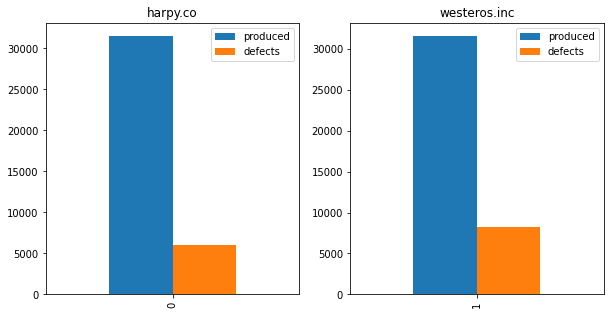

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
n = 0
for i in all_time_data.supplier.unique():
    tmp_table = all_time_data.loc[all_time_data['supplier'] == i]
    tmp_table.plot.bar(ax = axes[n], y = ['produced', 'defects'], title = i)
    n+=1
plt.savefig('all_time.png')
plt.show()


### Количество произведенных и сломавшихся мечей для каждой компании-поставщика в каждый месяц

In [13]:
month_data = data.drop(['unsullen.id', 'report.date'], axis=1)
month_data = month_data.groupby(['supplier', 'production.date'], as_index=False).sum()
    
produced_data = month_data.pivot(index = 'production.date', columns = 'supplier', values = 'produced')
defects_data = month_data.pivot(index = 'production.date', columns = 'supplier', values = 'defects')

In [14]:
produced_data

supplier,harpy.co,westeros.inc
production.date,,
1,5248,5280
2,5256,5272
3,5243,5298
4,5282,5285
5,5243,5263
6,5260,5227


In [15]:
defects_data

supplier,harpy.co,westeros.inc
production.date,,
1,2355,2186
2,1798,1945
3,1134,1657
4,408,1211
5,258,832
6,127,437


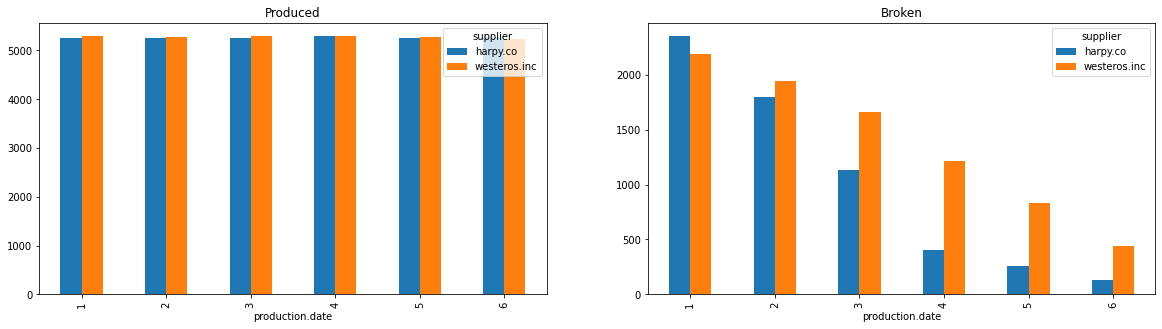

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))

produced_data.plot.bar(ax = axes[0], title = 'Produced')
defects_data.plot.bar(ax = axes[1], title = 'Broken')

plt.savefig('monthly.png')
plt.show()

### Соотношение числа сломавшихся мечей и общего числа выкованных за каждый месяц

In [18]:
month_data['%'] = month_data['defects']/month_data['produced']*100

In [19]:
month_data

,supplier,production.date,produced,defects,%
0,harpy.co,1,5248,2355,44.874238
1,harpy.co,2,5256,1798,34.208524
2,harpy.co,3,5243,1134,21.628838
3,harpy.co,4,5282,408,7.724347
4,harpy.co,5,5243,258,4.920847
5,harpy.co,6,5260,127,2.414449
6,westeros.inc,1,5280,2186,41.401515
7,westeros.inc,2,5272,1945,36.893020
8,westeros.inc,3,5298,1657,31.275953
9,westeros.inc,4,5285,1211,22.913907


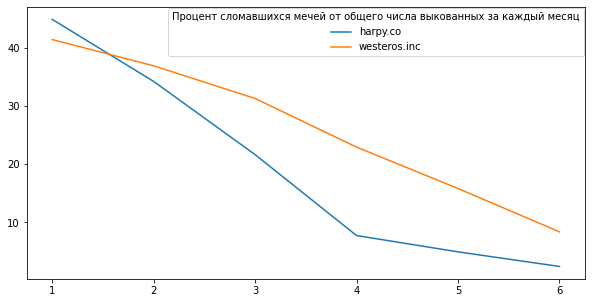

In [20]:
fig = plt.figure(figsize=(10, 5)).add_subplot(111)

for i in month_data.supplier.unique():
    tmp_table = month_data.loc[month_data['supplier'] == i]
    fig.plot(tmp_table['production.date'], tmp_table['%'], label = i)
    fig.legend(borderaxespad=0.1, title = 'Процент сломавшихся мечей от общего числа выкованных за каждый месяц')
    
plt.savefig('monthly_percents.png')
plt.show()

### Количество поломок в зависимости от кузнеца для каждой компании-поставщика

In [21]:
data['unsullen.id'].max()

100

In [22]:
unsullen_data = data.drop(['report.date', 'production.date'], axis=1)
unsullen_data = unsullen_data.groupby(['supplier', 'unsullen.id'], as_index=False).sum()

In [23]:
unsullen_data

,supplier,unsullen.id,produced,defects
0,harpy.co,1,633,120
1,harpy.co,2,625,122
2,harpy.co,3,621,117
3,harpy.co,4,633,119
4,harpy.co,5,634,127
...,...,...,...,...
95,westeros.inc,96,637,161
96,westeros.inc,97,626,158
97,westeros.inc,98,643,179
98,westeros.inc,99,635,153


In [47]:
unsullen_data[unsullen_data['supplier'] == 'harpy.co']['unsullen.id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

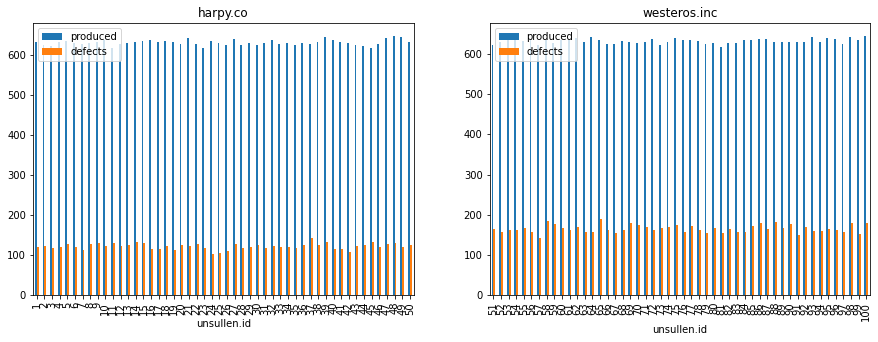

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
n = 0

for i in unsullen_data.supplier.unique():
    tmp_table = unsullen_data.loc[unsullen_data ['supplier'] == i]
    tmp_table.index = tmp_table['unsullen.id']
    tmp_table = tmp_table.drop(['supplier', 'unsullen.id'], axis=1)
    tmp_table.plot.bar(ax = axes[n], title = i)
    n+=1
    
plt.savefig('unsullen.png')
plt.show()

In [26]:
unsullen_data['%'] = unsullen_data['defects']/unsullen_data['produced']*100

In [27]:
unsullen_data.groupby(['supplier']).mean()['%']

supplier
harpy.co        19.283609
westeros.inc    26.142451
Name: %, dtype: float64

In [28]:
unsullen_data.groupby(['supplier']).var()['%']

supplier
harpy.co        1.363986
westeros.inc    2.071347
Name: %, dtype: float64

#### Посчитаем z-оценку для того чтобы проверить, что безупречные действительно безупречны в кузнечном мастерстве.

In [34]:
zscore_percent = unsullen_data.groupby(['supplier'])['%'].apply(zscore)

In [38]:
abs(zscore_percent['harpy.co']) > 3

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

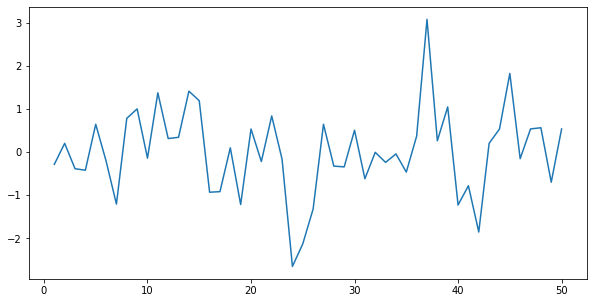

In [52]:
fig, axes = plt.subplots(figsize = (10, 5))

axes.plot(np.arange(1, 51, 1), zscore_percent['harpy.co'])

In [39]:
abs(zscore_percent['westeros.inc']) > 3

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

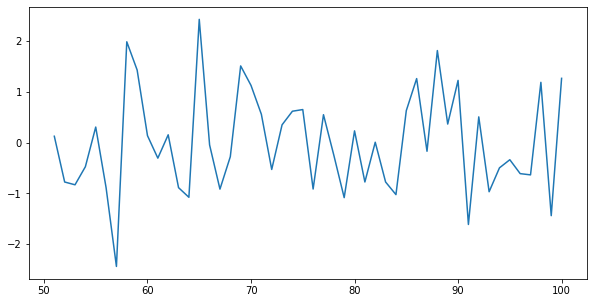

In [50]:
fig, axes = plt.subplots(figsize = (10, 5))

axes.plot(np.arange(51, 101, 1), zscore_percent['westeros.inc'])

#### как можно заметить все кузнецы имеют примерно один и тот же уровень квалификации, выбросов практически нет.

### Количество поломанной продукции после каждого месяца экспуатации для каждой компании поставщика

In [53]:
how_long_until_broken_data = data.drop(['unsullen.id', 'produced'], axis=1)
how_long_until_broken_data['served_total'] = how_long_until_broken_data['report.date'] - how_long_until_broken_data['production.date']

how_long_until_broken_data = how_long_until_broken_data.groupby(['production.date', 'supplier', 'served_total'], as_index=False).sum()
how_long_until_broken_data = how_long_until_broken_data.drop(['production.date', 'report.date'], axis=1)

In [54]:
how_long_until_broken_data

,supplier,served_total,defects
0,harpy.co,0,0
1,harpy.co,1,126
2,harpy.co,2,135
3,harpy.co,3,132
4,harpy.co,4,777
5,harpy.co,5,648
6,harpy.co,6,537
7,westeros.inc,0,0
8,westeros.inc,1,449
9,westeros.inc,2,406


In [55]:
how_long_until_broken_data = how_long_until_broken_data.groupby(['supplier', 'served_total'], as_index=False).mean()

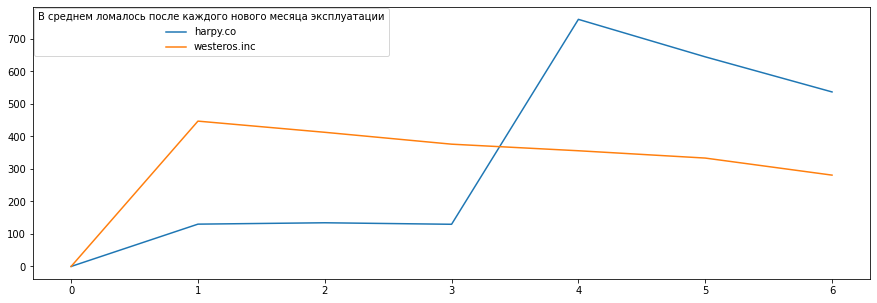

In [56]:
fig = plt.figure(figsize=(15, 5)).add_subplot(111)

for i in how_long_until_broken_data.supplier.unique():
    tmp_table = how_long_until_broken_data.loc[how_long_until_broken_data['supplier'] == i]
    fig.plot(tmp_table['served_total'], tmp_table['defects'], label = i)
    fig.legend(borderaxespad=0.1, title = 'В среднем ломалось после каждого нового месяца эксплуатации')
plt.savefig('how_long_until_broken.png')
plt.show()